In [1]:
!pip install yfinance

In [2]:
!pip install cufflinks

In [3]:
!pip install pandas_datareader

In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline

In [5]:
# Create start and end variables
start= datetime.datetime(2021,1,1)
end = datetime.datetime(2021,5,25)

# Gather Stock Information

In [6]:
#STOCK INFORMATION ON SELECT FIRMS IN THE CONSUMER CYCLICAL INDUSTRY BASED ON MARKET CAP

# First Internet Bancorp
INBK = data.DataReader('INBK','yahoo',start,end)
# MetroCity Bankshares, Inc.
MCBS = data.DataReader('MCBS','yahoo',start,end)
# Beazer Homes USA, Inc.
BZH = data.DataReader('BZH','yahoo', start,end)
# PulteGroup, Inc.
PHM = data.DataReader('PHM', 'yahoo', start,end)

In [7]:
tickers = ['INBK','MCBS','BZH','PHM']

In [8]:
top_stocks = pd.concat([INBK,MCBS,BZH,PHM], axis = 1, keys = tickers)

In [9]:
top_stocks.columns.names = ['Consumer Ticker','Stock Info']

In [10]:
top_stocks.head()

Consumer Ticker   INBK                                                       \
Stock Info        High        Low       Open      Close   Volume  Adj Close   
Date                                                                          
2021-01-04       28.73  27.350000  28.730000  27.850000  58700.0  27.802528   
2021-01-05       28.51  27.330000  27.910000  27.559999  21100.0  27.513021   
2021-01-06       30.25  28.370001  28.370001  29.549999  36800.0  29.499630   
2021-01-07       30.24  27.760000  29.670000  30.059999  46900.0  30.008760   
2021-01-08       30.27  29.549999  30.250000  30.270000  29500.0  30.218403   

Consumer Ticker   MCBS                        ...    BZH                 \
Stock Info        High     Low   Open  Close  ...   Open  Close  Volume   
Date                                          ...                         
2021-01-04       14.49  14.035  14.43  14.18  ...  15.20  14.65  429600   
2021-01-05       14.58  14.080  14.08  14.44  ...  14.56  14.77  411800   
2021-01-06       15.30  14.580  14.58  15.11  ...  14.88  15.27  453300   
2021-01-07       15.25  14.900  15.22  15.20  ...  15.35  15.85  345800   
2021-01-08       15.21  14.520  15.21  14.88  ...  15.94  15.06  302200   

Consumer Ticker                  PHM                                   \
Stock Info      Adj Close       High        Low       Open      Close   
Date                                                                    
2021-01-04          14.65  43.430000  41.330002  43.290001  42.209999   
2021-01-05          14.77  41.700001  40.360001  40.759998  41.070000   
2021-01-06          15.27  41.180000  39.919998  40.529999  40.849998   
2021-01-07          15.85  42.700001  40.560001  40.950001  42.490002   
2021-01-08          15.06  43.090000  41.299999  42.740002  41.529999   

Consumer Ticker                        
Stock Info          Volume  Adj Close  
Date                                   
2021-01-04       3666100.0  42.088978  
2021-01-05       4652700.0  40.952248  
2021-01-06       3850100.0  40.732876  
2021-01-07       3896300.0  42.368179  
2021-01-08       2439100.0  41.410927  

[5 rows x 24 columns]

In [11]:
top_stocks.to_csv('top_Stock.csv')

# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

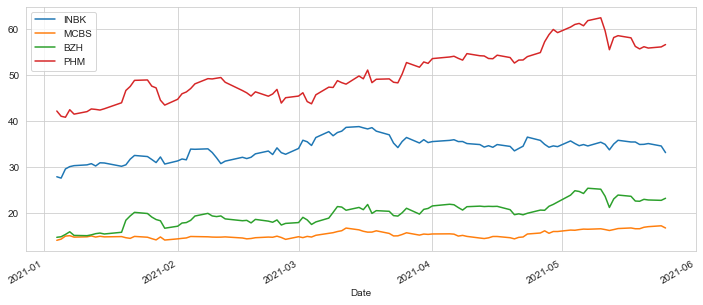

In [13]:
for tick in tickers:
    top_stocks[tick]['Adj Close'].plot(label = tick, figsize = (12,5))
plt.legend()

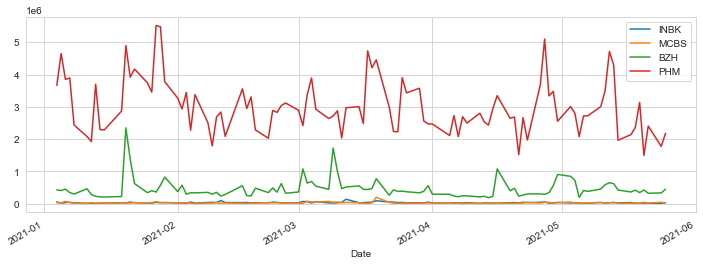

In [14]:
for tick in tickers:
    top_stocks[tick]['Volume'].plot(label = tick, figsize = (12,4))
plt.legend()

<AxesSubplot:xlabel='Consumer Ticker', ylabel='Consumer Ticker'>

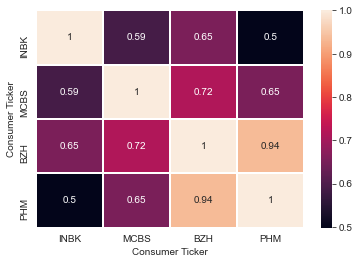

In [15]:
# Create heatmap
sns.heatmap(top_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True,lw = 1)

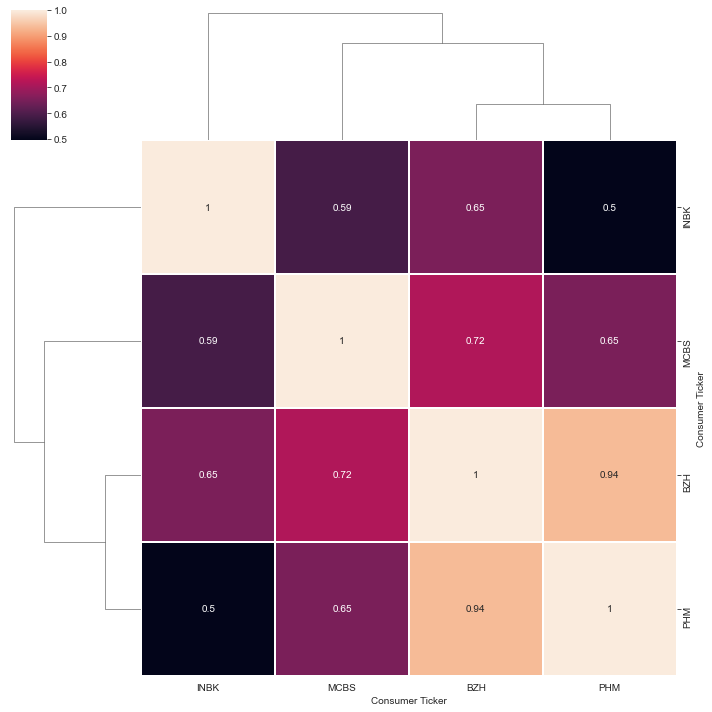

In [16]:
# Create cluter map
sns.clustermap(top_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, lw = 1)